<a href="https://colab.research.google.com/github/Breakrule/Breakrule/blob/main/KNN_Rezky_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/abalone2.xlsx", encoding="utf-8")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df.head()

,sex,length,diameter,height,whole hei,shucked he,viscera hei,shell weigh,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Drop dulu Kolom Quality**


In [ ]:
X = df.drop('rings',1)
X.head()



,sex,length,diameter,height,whole hei,shucked he,viscera hei,shell weigh
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Ubah dari data frame kedalam bentuk undimensional array (feature matrix)

In [ ]:
X = X.values # mendapatkan value dari dataframe X
X

array([[1.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [1.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [2.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [1.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [2.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [1.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [ ]:
## Ambil nilai  df quality

In [ ]:
y1 = df['rings'].values
y1 #target variable

array([15,  7,  9, ...,  9, 10, 12])

In [ ]:
X.shape

(4177, 8)

In [ ]:

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import train_test_split
# split data menjadi training set dan training test
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size = 0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

array([[3.    , 0.55  , 0.445 , ..., 0.288 , 0.1365, 0.21  ],
       [3.    , 0.475 , 0.355 , ..., 0.2535, 0.091 , 0.14  ],
       [2.    , 0.305 , 0.225 , ..., 0.0585, 0.0335, 0.045 ],
       ...,
       [1.    , 0.51  , 0.395 , ..., 0.244 , 0.1335, 0.188 ],
       [1.    , 0.575 , 0.465 , ..., 0.516 , 0.2185, 0.235 ],
       [2.    , 0.595 , 0.475 , ..., 0.547 , 0.231 , 0.271 ]])

In [ ]:
X_train.shape

(3341, 8)

In [ ]:
X_test.shape

(836, 8)

## Mulai training dengan nilai K 
# dengan me import neighbor dari sklrearn

In [ ]:
# proses training data
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 3) # menentukan nilai K
knn_model_1 = knn.fit(X_train, y_train)

                    

In [ ]:
knn_model_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
## Lakukan proses testing/predicting terhadap knn_model_1 dan cek acurasinya
knn_result_1 = knn_model_1.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1)

K-NN accuracy for test set : 0.230861


In [ ]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

"precision : tp/(tp+fp)"
"recall : tp/(tp+fn)"
"f1-score: (2xprecision x recall)/precision + recall"



              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.17      0.31      0.22        13
           5       0.22      0.22      0.22        32
           6       0.29      0.35      0.32        48
           7       0.24      0.25      0.25        84
           8       0.23      0.38      0.28        99
           9       0.29      0.38      0.33       142
          10       0.23      0.19      0.20       139
          11       0.22      0.19      0.21        93
          12       0.07      0.04      0.05        51
          13       0.07      0.06      0.07        31
          14       0.20      0.08      0.11        26
          15       1.00      0.05      0.09        21
          16       0.25      0.08      0.12        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'f1-score: (2xprecision x recall)/precision + recall'

In [ ]:
from sklearn.metrics import confusion_matrix
#cara baca : row/label kiri itu actual, colom/label atas itu prediction
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  4,  4,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  2, 14,  7,  4,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 12, 17, 12,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  7, 20, 21, 22,  7,  3,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  7, 20, 38, 22,  5,  3,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  5, 10, 36, 54, 24,  8,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 10, 37, 30, 26, 19,  6,  7,  1,  0,  1,  0,
         1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  4, 16, 34, 14, 18,  1,  5,

In [ ]:
knn7 = neighbors.KNeighborsClassifier(n_neighbors = 7) # menentukan nilai K
knn_model_1_k7 = knn7.fit(X_train, y_train)
knn_result_1_k7 = knn_model_1_k7.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1_k7)

K-NN accuracy for test set : 0.234450


In [ ]:
knn11 = neighbors.KNeighborsClassifier(n_neighbors = 11) # menentukan nilai K
knn_model_1_k11 = knn11.fit(X_train, y_train)
knn_result_1_k11 = knn_model_1_k11.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1_k11)

K-NN accuracy for test set : 0.257177


In [ ]:
knn15 = neighbors.KNeighborsClassifier(n_neighbors = 15) # menentukan nilai K
knn_model_1_k15 = knn15.fit(X_train, y_train)
knn_result_1_k15 = knn_model_1_k15.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1_k15)

K-NN accuracy for test set : 0.257177


In [ ]:
knn47 = neighbors.KNeighborsClassifier(n_neighbors = 47) # menentukan nilai K
knn_model_1_k47 = knn47.fit(X_train, y_train)
knn_result_1_k47 = knn_model_1_k47.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1_k47)

K-NN accuracy for test set : 0.283493


In [ ]:
knn500 = neighbors.KNeighborsClassifier(n_neighbors = 500) # menentukan nilai K
knn_model_1_k500 = knn500.fit(X_train, y_train)
knn_result_1_k500 = knn_model_1_k500.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_1_k500)

K-NN accuracy for test set : 0.261962


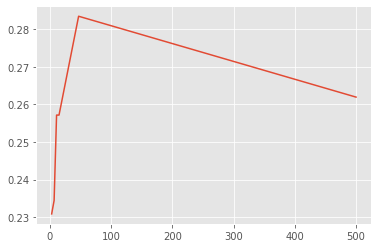

In [ ]:
plt.plot([3,7,11,15,47,500,],[knn_result_1, knn_result_1_k7, knn_result_1_k11, knn_result_1_k15, knn_result_1_k47, knn_result_1_k500])